**Final**

In [12]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib import pyplot as plt
import numpy as np

**Rules**
- No communication regarding exam. Just don't do anything funny.
- Use sklearn if you want
- Open everything
- You will be graded out of 270 points.
- Due Friday 24 July Midnight.
- It's designed so you can finish it in less than 3 hr. but take as long as you need.

# Decision Tree



## Splitting Criteria (20)

Let $p$ be the fraction of data point of class 1 which falls on one particular side. Which one of this function is a good splitting criteria? Do we want to minimize or maximize this?

a) $f(p) = sin(p\times \pi)$

b) $f(p) = cos(p \times \pi)$

## Trigonometry Tree  (60)

Build a classification tree based on the function you picked above. Plot the probability heat map.(one tree is enough)

Pick appropriate termination criteria.

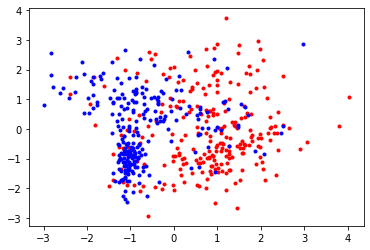

In [45]:
xs, ys = make_classification(n_samples=500, n_clusters_per_class=2, n_features=2, n_redundant=0, random_state=1234,  flip_y=0.2)
plt.plot(xs[:, 0][ys==1], xs[:, 1][ys==1], '.r')
plt.plot(xs[:, 0][ys==0], xs[:, 1][ys==0], '.b')

## Decision Tree Facts (20)

Make the correct statement bold.

1) If we allow the decision tree to grow really deep, $E_{in}$ would be higher/lower.

2) The Random Forest that we did in the homework, will have $E_{in}$ higher/lower than just a single tree.


# Dimension Reduction (PCA, Low Rank, etc.)

## Why low dimension? (20)
Why do we want to reduce the dimesion? Don't write an essay. Just short answer

In [ ]:
# In order to reduce the quantity of information by removing redundant or irrelevant information, 
# since too much information is not always good for classification.

## PCA (60)

Perform PCA on this data (be sure to normalize the data). What is $r_1=(0.5,0.3)$ (pre normalize) on the new maximum variance axis?

Use sklearn if you want.

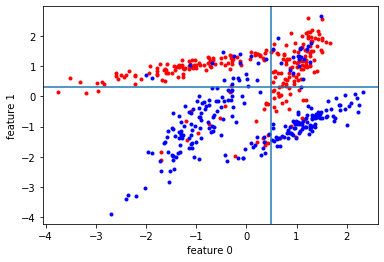

In [37]:
xs, ys = make_classification(n_samples=500, n_clusters_per_class=2, n_features=2, n_redundant=0, random_state=2222,  flip_y=0.2)
plt.plot(xs[:, 0][ys==1], xs[:, 1][ys==1], '.r')
plt.plot(xs[:, 0][ys==0], xs[:, 1][ys==0], '.b')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.axhline(0.3)
plt.axvline(0.5)

In [20]:
xs.shape

(500, 2)

In [22]:
x1 = xs[:, 0]
x2 = xs[:, 1]

norm_x1 = (x1 - np.mean(x1)) / np.std(x1)
norm_x2 = (x2 - np.mean(x2)) / np.std(x2)

norm_xs = np.vstack([norm_x1, norm_x2])

In [23]:
cov = np.cov(norm_xs)
cov

array([[1.00200401, 0.18716457],
       [0.18716457, 1.00200401]])

In [26]:
eigval, eigvec = np.linalg.eig(cov)

print(eigval)
print(eigvec)

[0.81483943 1.18916858]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


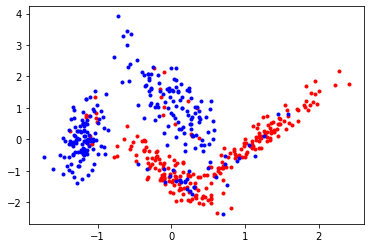

In [30]:
v0 = eigvec[:, 0]
v1 = eigvec[:, 1]

rotated_feat_0 = np.dot(norm_xs.T, v0)
rotated_feat_1 = np.dot(norm_xs.T, v1)

plt.plot(rotated_feat_0[ys==1], rotated_feat_1[ys==1], '.r')
plt.plot(rotated_feat_0[ys==0], rotated_feat_1[ys==0], '.b')

In [45]:
xx = np.array([0.5, 0.3])

norm_xx = (xx - np.mean(xx)) / np.std(xx)

rotated_xx_0 = np.dot(xx.T, v0)
rotated_xx_1 = np.dot(xx.T, v1)

r1 on new variance axis: (-0.14, -0.57)


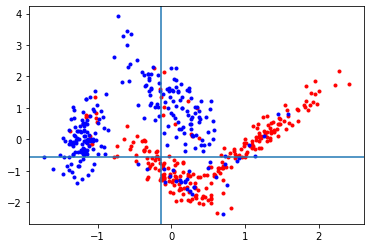

In [54]:
plt.plot(rotated_feat_0[ys==1], rotated_feat_1[ys==1], '.r')
plt.plot(rotated_feat_0[ys==0], rotated_feat_1[ys==0], '.b')

plt.axhline(rotated_xx_1)
plt.axvline(rotated_xx_0)

print('r1 on new variance axis: ({:.2f}, {:.2f})'.format(rotated_xx_0, rotated_xx_1))

## Fun Facts (20)

Make the correct statement **bold**

1) PCA is based on the assumption that the feature that has more separation power has **more**/less variance.

2) Low Rank approximation try to maximize (variance/**reconstruction power**) in as few as possible dimension. 

# Clustering

## Do they belong to the same cluster? (50)

Use K-mean Clustering(euclidean distance) on the data below and find out if $r_1=(0,0)$ and $r_2=(-2.5,2)$ belongs to the same cluster. 

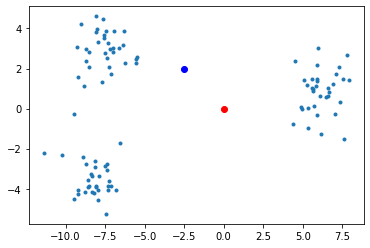

In [66]:
x, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=999)
plt.plot(x[:,0], x[:, 1], '.')
plt.plot(0, 0, 'ro')
plt.plot(-2.5, 2, 'bo')

In [80]:
r1 = np.array([0, 0])
r2 = np.array([-2.5, 2])

rs = np.vstack([r1, r2])

xs = np.vstack([x, rs])

In [81]:
xs.shape

(102, 2)

In [56]:
def do_cluster(point, centroids):
    dist = [np.sum((point - centroid)**2) for centroid in centroids]
    return np.argmin(dist)

def k_mean(data, k):
    n_features = data.shape[1]
    n_data = data.shape[0]
    
    centroids_idx = np.random.choice(list(range(n_data)), k, replace=False)
    centroids = [data[i].copy() for i in centroids_idx]
    
    for i in range(20):
        clusters = np.array([do_cluster(point, centroids) for point in data])
        centroids = [np.mean(data[clusters == j], axis = 0) for j in range(k)]
            
    return centroids

In [60]:
def color_data(data, centroids):
    clusters = np.array([do_cluster(point, centroids) for point in data])
    for ic, centroid in enumerate(centroids):
        tmp = data[clusters==ic]
        plt.plot(tmp[:,0], tmp[:,1], '.', color=f'C{ic}')
        plt.plot(centroid[0], centroid[1], 'o', color=f"C{ic}")

In [82]:
centroids = k_mean(xs, 3)

'r1 and r2 are not in the same cluster'

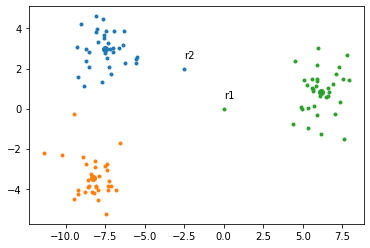

In [97]:
color_data(xs, centroids)
plt.annotate('r1', (0, 0.5))
plt.annotate('r2', (-2.5, 2.5))

'r1 and r2 are not in the same cluster'

# SVM (50)

Find and Draw the linear svm separation line for this data.

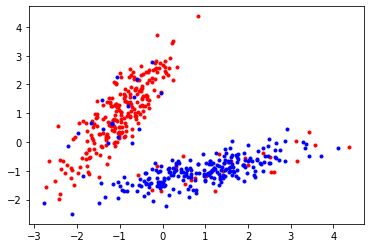

In [98]:
xs, ys = make_classification(n_samples=500, n_clusters_per_class=1, n_features=2, n_redundant=0, random_state=333,  flip_y=0.2)
plt.plot(xs[:, 0][ys==1], xs[:, 1][ys==1], '.r')
plt.plot(xs[:, 0][ys==0], xs[:, 1][ys==0], '.b')

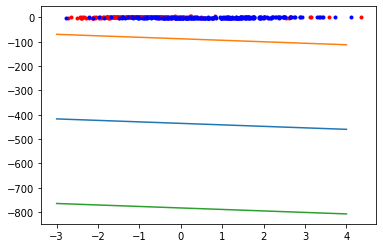

In [103]:
import numpy as np
from scipy.optimize import minimize

C = 10000
def cost(v):
    w = v[: -1]
    b = v[-1]
    sw = np.sum(w**2)
    xi = 1 - ys * (np.dot(xs, w) + b)
    xi = np.maximum(xi, 0)
    return sw + C * np.sum(xi**2) # **2 is not necessary

res = minimize(cost, np.array([1, 2, 3]))
w = res.x[:-1]
b = res.x[-1]

c = -b/w[1]
m = -w[0]/w[1]
x1s = np.linspace(-3, 4, 100)
x2s = m * x1s + c
plt.plot(x1s, x2s)

c = -(b-1)/w[1]
m = -w[0]/w[1]
x1s = np.linspace(-3, 4, 100)
x2s = m * x1s + c
plt.plot(x1s, x2s)

c = -(b + 1)/w[1]
m = -w[0]/w[1]
x1s = np.linspace(-3, 4, 100)
x2s = m * x1s + c
plt.plot(x1s, x2s)

plt.plot(xs[:, 0][ys==1], xs[:, 1][ys==1], '.r')
plt.plot(xs[:, 0][ys==0], xs[:, 1][ys==0], '.b')

In [ ]:
# Yes there is no collaborative filtering I think it's long enough.